# **Modelling**

## **Step1.** Import Data

In [215]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [187]:
#flights table
data = pd.read_csv('/Users/Prashanta/Desktop/airplane_data/flights_table(50,000_points).csv',delimiter=';')
data = data.iloc[: , 1:]

#create two samples of 10,000 points each
sample1 = data.sample(n=10000, random_state=0)
sample2 = data.sample(n=10000, random_state=1)

#Adding date time features and state
sample1['month'] = pd.DatetimeIndex(sample1['fl_date']).month
sample2['month'] = pd.DatetimeIndex(sample2['fl_date']).month
sample1['year'] = pd.DatetimeIndex(sample1['fl_date']).year
sample2['year'] = pd.DatetimeIndex(sample2['fl_date']).year
sample1['origin_city_state'] = sample1['origin_city_name'].transform(lambda x: str(x).split(',')[1])
sample2['origin_city_state'] = sample2['origin_city_name'].transform(lambda x: str(x).split(',')[1])
sample1['depart_hour'] = sample1['dep_time'].round(-2)
sample2['depart_hour'] = sample2['dep_time'].round(-2)

In [4]:
display(data.head(3))
display(data.shape)

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2019-12-30,WN,WN,WN,775,WN,N255WN,775,13495,MSY,...,674.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-04-08,AS,AS,AS,352,AS,N464AS,352,14747,SEA,...,672.0,0.0,0.0,25.0,0.0,0.0,NaN,NaN,NaN,NaN
2,2018-11-21,DL,DL,DL,1312,DL,N912DL,1312,10994,CHS,...,259.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(50000, 42)

## **Step2.** Create BaseModel using Linear Regression

In [135]:
#create test model df
test_model_1 = sample1[['month','origin_city_state','depart_hour','arr_delay']]

# Droping nan value rows
test_model_1.dropna(inplace=True)

# Encode Cateogircal Values 
# Change dtype of variable to category then encode using cat.codes
test_model_1['origin_city_state'] = test_model_1['origin_city_state'].astype('category')
test_model_1['origin_city_state'] = test_model_1['origin_city_state'].cat.codes

#Assign train and target variables
X = test_model_1[['month','origin_city_state','depart_hour']]
y = test_model_1['arr_delay']

<ipython-input-135-ac5d82c39b9a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_model_1.dropna(inplace=True)
<ipython-input-135-ac5d82c39b9a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_model_1['origin_city_state'] = test_model_1['origin_city_state'].astype('category')
<ipython-input-135-ac5d82c39b9a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

In [136]:
# split X and y into training and testing sets 
import sklearn.model_selection as model_selection

X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y,train_size=0.75,test_size=0.25,random_state=123)

# import libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

#initialize and fit training dataset
Linear_Regressor = LinearRegression()
Linear_Regressor.fit(X_train, y_train)

#make prediction 
y_pred = Linear_Regressor.predict(X_test)

#prints the coefficients used for each attribute
print('variables', list(X.columns))
print('coefficients:', Linear_Regressor.coef_)
print()

#prints the R2 score for your test dataset
print('R2 Score for train data:', round(Linear_Regressor.score(X_train,y_train),3))
print('R2 Score2 for test data:', round(r2_score(y_test,y_pred),3))
print('MAE Score for test data: ', round(mean_absolute_error(y_test,y_pred),2))

variables ['month', 'origin_city_state', 'depart_hour']
coefficients: [-0.07959701  0.04777177  0.01045926]

R2 Score for train data: 0.012
R2 Score2 for test data: 0.015
MAE Score for test data:  23.62


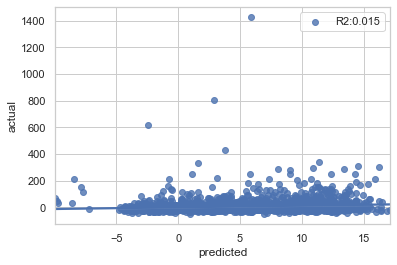

In [137]:
df = pd.DataFrame(
        {
            'actual':y_test,
            'predicted':y_pred
        }
)
df

sns.regplot(x='predicted',y='actual',data=df,label='R2:'+ str(round(r2_score(y_test,y_pred),3)))
plt.legend(loc=0)

## **Step3.** Add key features to basemodel and run Linear Reg again

## **Step4.** Remove outlier data from Key Features

## **Step5.** Optimize model with better features and cleaner dataset

In [521]:
# load dataset (50,000 datapoints)
data = pd.read_csv('/Users/Prashanta/Desktop/airplane_data/flights_table(50,000_points).csv',delimiter=';')
data = data.iloc[: , 1:]

# drop all cancelled and diverted flights
filter1 = (data['cancelled']!=1) & (data['diverted']!=1)
data = data[filter1]

# drop outlier
data = data[(data['arr_delay']<50) & (data['arr_delay']>-50)]
data = data[(data['dep_delay']<50) & (data['dep_delay']>-50)]

#Adding date time features and state
data['month'] = pd.DatetimeIndex(data['fl_date']).month
data['year'] = pd.DatetimeIndex(data['fl_date']).year
data['day'] = pd.DatetimeIndex(data['fl_date']).day
data['origin_city_state'] = data['origin_city_name'].transform(lambda x: str(x).split(',')[1])
data['origin_city'] = data['origin_city_name'].transform(lambda x: str(x).split(',')[0])
data['dest_city_state'] = data['dest_city_name'].transform(lambda x: str(x).split(',')[1])
data['dest_city'] = data['dest_city_name'].transform(lambda x: str(x).split(',')[0])
data['depart_hour'] = data['dep_time'].round(-2)

# Add key features
data['Route'] = data['origin_city'] + ' to ' + data['dest_city']

data['dep_delay_city'] = data[['dep_delay','origin_city']].groupby(by='origin_city').transform(lambda x: x.mean())
data['arr_delay_city'] = data[['arr_delay','origin_city']].groupby(by='origin_city').transform(lambda x: x.mean())
data['taxi_out_city'] = data[['taxi_out','origin_city']].groupby(by='origin_city').transform(lambda x: x.mean())
data['taxi_in_city'] = data[['taxi_in','origin_city']].groupby(by='origin_city').transform(lambda x: x.mean())

#drop columns
data = data[['month','day','year','origin_city','origin_city_state','dest_city','dest_city_state','Route','distance','air_time','depart_hour','dep_delay_city','arr_delay_city','taxi_out_city','taxi_in_city','arr_delay']]

In [522]:
# missing data
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

display(missing_data.head(20))
display(data.shape)

,Total,Percent
air_time,24,0.000538
arr_delay,0,0.000000
taxi_in_city,0,0.000000
taxi_out_city,0,0.000000
arr_delay_city,0,0.000000
dep_delay_city,0,0.000000
depart_hour,0,0.000000
distance,0,0.000000
Route,0,0.000000
dest_city_state,0,0.000000


(44575, 16)

In [523]:
#drop null values
data = data.dropna()
display(data.shape)

(44551, 16)

In [524]:
data

,month,day,year,origin_city,origin_city_state,dest_city,dest_city_state,Route,distance,air_time,depart_hour,dep_delay_city,arr_delay_city,taxi_out_city,taxi_in_city,arr_delay
0,12,30,2019,New Orleans,LA,Fort Lauderdale,FL,New Orleans to Fort Lauderdale,674.0,84.0,600.0,1.710611,-4.176849,11.800643,8.057878,-3.0
1,4,8,2018,Seattle,WA,Oakland,CA,Seattle to Oakland,672.0,98.0,600.0,1.014692,-4.634527,19.509642,6.965106,25.0
2,11,21,2018,Charleston,SC,Atlanta,GA,Charleston to Atlanta,259.0,46.0,800.0,-1.163522,-7.421384,14.861635,8.779874,-13.0
3,12,19,2019,Fort Lauderdale,FL,Pittsburgh,PA,Fort Lauderdale to Pittsburgh,994.0,128.0,2200.0,1.163701,-4.740214,17.135231,7.814947,-16.0
4,9,21,2019,Roanoke,VA,Chicago,IL,Roanoke to Chicago,530.0,82.0,1100.0,1.934783,-4.913043,18.152174,8.673913,-36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,2,3,2018,San Diego,CA,Oakland,CA,San Diego to Oakland,446.0,65.0,900.0,0.372477,-5.754128,16.660550,7.174312,-15.0
49995,6,28,2019,Rochester,NY,Philadelphia,PA,Rochester to Philadelphia,257.0,52.0,1000.0,-3.457364,-8.736434,16.627907,9.007752,-18.0
49997,3,3,2018,Chicago,IL,St. Louis,MO,Chicago to St. Louis,258.0,45.0,1000.0,1.995374,-3.535852,19.684271,6.208173,-24.0
49998,9,5,2018,Atlanta,GA,Bloomington/Normal,IL,Atlanta to Bloomington/Normal,533.0,74.0,2100.0,2.164212,-4.487729,16.423918,6.187416,-12.0


In [509]:
# Encode Cateogircal Values 
# Change dtype of variable to category then encode using cat.codes
data['origin_city_state'] = data['origin_city_state'].astype('category')
data['origin_city'] = data['origin_city'].astype('category')
data['dest_city_state'] = data['dest_city_state'].astype('category')
data['dest_city'] = data['dest_city'].astype('category')

data['origin_city_state'] = data['origin_city_state'].cat.codes
data['origin_city'] = data['origin_city'].cat.codes
data['dest_city_state'] = data['dest_city_state'].cat.codes
data['dest_city'] = data['dest_city'].cat.codes

In [512]:
data

,month,day,year,origin_city,origin_city_state,dest_city,dest_city_state,distance,air_time,depart_hour,dep_delay_city,arr_delay_city,taxi_out_city,taxi_in_city,arr_delay
0,12,30,2019,220,17,105,8,674.0,84.0,600.0,1.710611,-4.176849,11.800643,8.057878,-3.0
1,4,8,2018,296,49,233,4,672.0,98.0,600.0,1.014692,-4.634527,19.509642,6.965106,25.0
2,11,21,2018,52,40,17,9,259.0,46.0,800.0,-1.163522,-7.421384,14.861635,8.779874,-13.0
3,12,19,2019,103,8,249,37,994.0,128.0,2200.0,1.163701,-4.740214,17.135231,7.814947,-16.0
4,9,21,2019,267,46,61,13,530.0,82.0,1100.0,1.934783,-4.913043,18.152174,8.673913,-36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,2,3,2018,281,4,233,4,446.0,65.0,900.0,0.372477,-5.754128,16.660550,7.174312,-15.0
49995,6,28,2019,268,33,247,37,257.0,52.0,1000.0,-3.457364,-8.736434,16.627907,9.007752,-18.0
49997,3,3,2018,59,13,307,23,258.0,45.0,1000.0,1.995374,-3.535852,19.684271,6.208173,-24.0
49998,9,5,2018,16,9,36,13,533.0,74.0,2100.0,2.164212,-4.487729,16.423918,6.187416,-12.0


In [511]:
#Assign train and target variables
X = data[['month','day','year','origin_city','origin_city_state','dest_city','dest_city_state','distance','air_time','depart_hour','dep_delay_city','arr_delay_city','taxi_out_city','taxi_in_city']]
y = data['arr_delay']

# split X and y into training and testing sets 
import sklearn.model_selection as model_selection

X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y,train_size=0.75,test_size=0.25,random_state=123)

# import libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

#initialize and fit training dataset
Linear_Regressor = LinearRegression()
Linear_Regressor.fit(X_train, y_train)

#make prediction 
y_pred = Linear_Regressor.predict(X_test)

#prints the coefficients used for each attribute
print('variables', list(X.columns))
print('coefficients:', Linear_Regressor.coef_)
print()

#prints the R2 score for your test dataset
print('R2 Score for train data:', round(Linear_Regressor.score(X_train,y_train),3))
print('R2 Score2 for test data:', round(r2_score(y_test,y_pred),3))
print('MAE Score for test data: ', round(mean_absolute_error(y_test,y_pred),2))

variables ['month', 'day', 'year', 'origin_city', 'origin_city_state', 'dest_city', 'dest_city_state', 'distance', 'air_time', 'depart_hour', 'dep_delay_city', 'arr_delay_city', 'taxi_out_city', 'taxi_in_city']
coefficients: [ 0.0522915   0.00437005 -0.44982138  0.00399962 -0.01599539 -0.00216022
  0.00981583 -0.04015131  0.33333248  0.00364384 -0.20594272  1.20289089
 -0.19814516 -0.41279631]

R2 Score for train data: 0.097
R2 Score2 for test data: 0.1
MAE Score for test data:  11.35


In [467]:
late = data['arr_delay']>0
early = data['arr_delay']<0
on_time = data['arr_delay']==0

late_flights = data[late]
early_flights = data[early]
on_time_flights = data[on_time]

array([[<AxesSubplot:title={'center':'air_time'}>,
        <AxesSubplot:title={'center':'arr_delay'}>,
        <AxesSubplot:title={'center':'arr_delay_city'}>],
       [<AxesSubplot:title={'center':'day'}>,
        <AxesSubplot:title={'center':'dep_delay_city'}>,
        <AxesSubplot:title={'center':'depart_hour'}>],
       [<AxesSubplot:title={'center':'distance'}>,
        <AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'taxi_out_city'}>],
       [<AxesSubplot:title={'center':'year'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

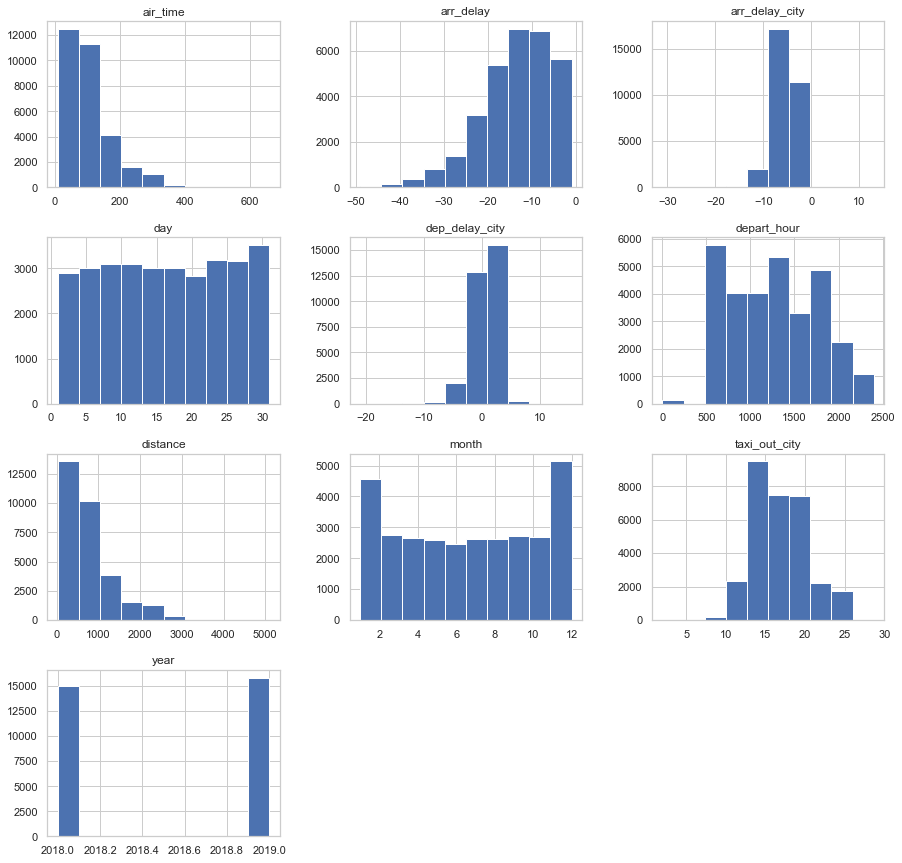

In [470]:
early_flights.hist(figsize=(15,15))